In [8]:
from utils import get_stock_df
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = get_stock_df("JPM", start_date='2008-01-01', end_date='2009-12-31')

In [5]:
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-17,41.119999,40.189999,41.060001,40.270000,44272800.0,31.442390
2009-12-18,41.189999,40.040001,40.529999,40.950001,48126800.0,31.973337
2009-12-21,42.240002,41.500000,41.549999,41.900002,35991900.0,32.715076
2009-12-22,42.099998,41.689999,42.000000,41.939999,24754800.0,32.746307
2009-12-23,41.939999,41.450001,41.840000,41.560001,24503600.0,32.449612
2009-12-24,41.889999,41.509998,41.680000,41.889999,7956500.0,32.707279
2009-12-28,42.130001,41.560001,41.849998,41.720001,13039900.0,32.574539
2009-12-29,41.799999,41.459999,41.730000,41.490002,15593000.0,32.394947
2009-12-30,41.619999,41.230000,41.270000,41.529999,15501800.0,32.426193


Text(0.5, 0, 'Year')

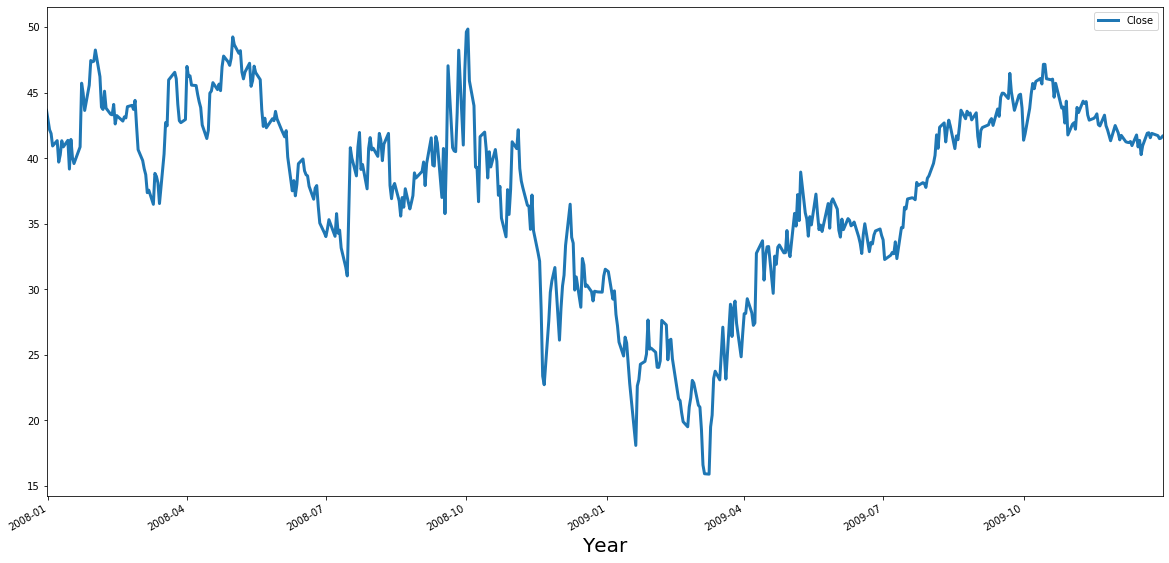

In [17]:
df[['Close']].plot(figsize=(20,10), linewidth=3, fontsize=10)
plt.xlabel("Year", fontsize=20)

In [26]:
TIME_WINDOW = 20

# Simple moving average

In [24]:
df['sma'] = df['Close'].rolling(TIME_WINDOW).mean()

Text(0.5, 0, 'Year')

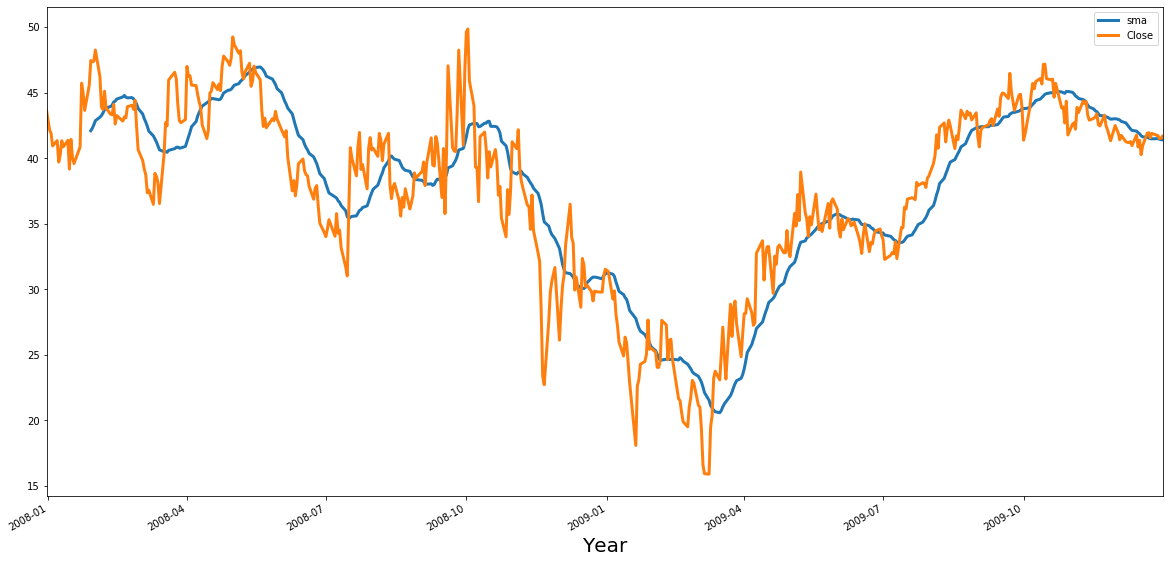

In [25]:
df[['sma', 'Close']].plot(figsize=(20,10), linewidth=3, fontsize=10)
plt.xlabel("Year", fontsize=20)

# Bollinger Bands

In [28]:
k = 1

In [32]:
df['std'] = df['Close'].rolling(TIME_WINDOW).std()
df['BB_upper'] = df['sma'] + k*df['std']
df['BB_lower'] = df['sma'] - k*df['std']

Text(0.5, 0, 'Year')

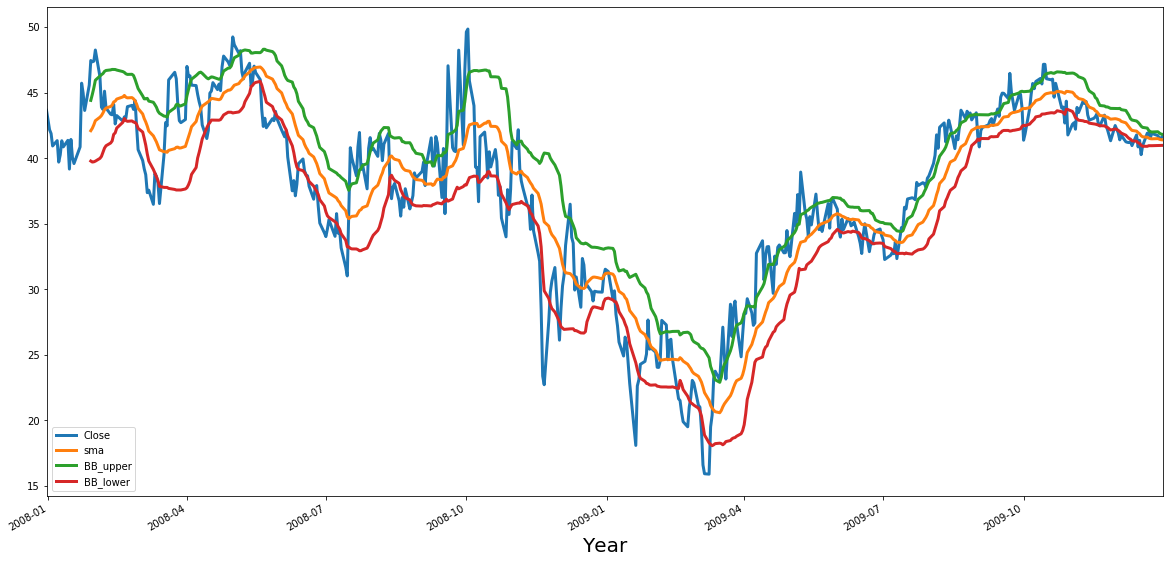

In [33]:
df[['Close', 'sma', 'BB_upper', 'BB_lower']].plot(figsize=(20, 10), linewidth=3, fontsize=10)
plt.xlabel("Year", fontsize=20)

In [34]:
df['BB'] = (df['Close'] - df['sma']) / (k * df['std'])

Text(0.5, 0, 'Year')

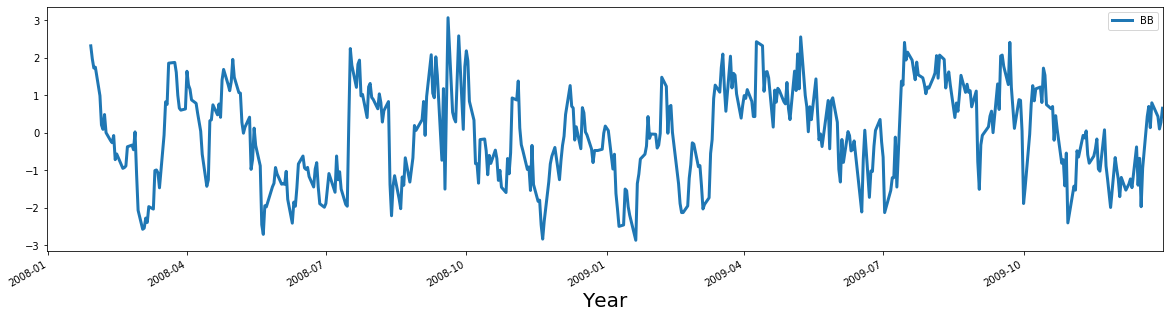

In [36]:
# sale if BB cross below 1
# buy if BB cross above -1
df[['BB']].plot(figsize=(20, 5), linewidth=3, fontsize=10)
plt.xlabel("Year", fontsize=20)

# moving average convergence/divergence(MACD)

> The MACD is generated by subtracting two EMAs to create the main line (the MACD line). The first line is then used to generate another EMA, resulting in a second line (known as the signal line). In addition, there is the MACD histogram, which is calculated based on the differences between those two lines.

# Relative strength index (RSI)